In [1]:
import gzip
import json
from pymatgen.electronic_structure.cohp import Cohp
from pymatgen.electronic_structure.plotter import CohpPlotter

<h2><center>Top level keys to access data from LOBSTER lightweight JSON files</center></h2>
<table>
    <thead>
    <tr>
        <th>Root Keys</th>
        <th>Data type</th>
        <th>Description</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td>all_bonds</td>
        <td>dict</td>
        <td>Summarized relevant bonds data (See table 2 of the manuscript for details)</td>
    </tr>
    <tr>
        <td>cation_anion_bonds</td>
        <td>dict</td>
        <td>Summarized relevant cation-anion bonds data (See table 2 of the manuscript forfor details)</td>
    </tr>
    <tr>
        <td>madelung_energies</td>
        <td>dict</td>
        <td>Total electrostatic energy for the structure as calculated from the Mulliken and Löwdin charges</td>
    </tr>
    <tr>
        <td>charges</td>
        <td>dict</td>
        <td>Atomic charges with Mulliken and Löwdin population analysis methods as keys. <br>
            Each keys corresponding list follows the order of sites in the crystal structure.</td>
    </tr>
    <tr>
        <td>calc_quality_summary</td>
        <td>dict</td>
        <td>Dict summarizing results of technical validation tests like charge spillings, <br>
            band overlaps, DOS and charge comparisons.</td>
    </tr>
    </tbody>
</table>

In [2]:
def read_lobster_lightweight_json(filename: str):
    """
    This function loads the json.gz files and returns a dictionary with lobsterpy summmarized bonding analysis.
    
    Args:
        filename (str) : name of file
    Returns:
        Returns a dictionary with lobstepy summmarized bonding analysis output.
    """
    with gzip.open(filename, 'rb') as f:
        data = json.loads(f.read().decode('utf-8'))
        
    lobster_data = {}
    for item in data:
        lobster_data.update(item)
   
    return lobster_data

In [3]:
lobster_summary = read_lobster_lightweight_json(filename='../Example_data/Lightweight_jsons/mp-1000.json.gz')

In [4]:
## Keys to access data
lobster_summary.keys()

dict_keys(['cation_anion_bonds', 'all_bonds', 'madelung_energies', 'charges', 'calc_quality_summary'])

## Lobsterpy automatic analysis 

#### Cation-anion mode

In [5]:
# Summarized bonding dictionary for cation-anion bonds 
lobster_summary['cation_anion_bonds']

{'lobsterpy_data': {'formula': 'BaTe',
  'max_considered_bond_length': 5.01322,
  'limit_icohp': [-inf, -0.1],
  'number_of_considered_ions': 1,
  'sites': {'0': {'env': 'O:6',
    'bonds': {'Te': {'ICOHP_mean': '-0.45',
      'ICOHP_sum': '-2.7',
      'has_antibdg_states_below_Efermi': True,
      'number_of_bonds': 6,
      'bonding': {'integral': 3.68, 'perc': 0.78801},
      'antibonding': {'integral': 0.99, 'perc': 0.21199}}},
    'ion': 'Ba',
    'charge': 1.58,
    'relevant_bonds': ['13', '14', '15', '16', '17', '18']}},
  'type_charges': 'Mulliken',
  'cutoff_icohp': 0.1,
  'summed_spins': False,
  'start': None,
  'cohp_plot_data': {'Ba1: 6 x Ba-Te': {'@module': 'pymatgen.electronic_structure.cohp',
    '@class': 'Cohp',
    'are_coops': False,
    'are_cobis': False,
    'efermi': 2.02158,
    'energies': [-26.71323,
     -26.70964,
     -26.70605,
     -26.70246,
     -26.69886,
     -26.69527,
     -26.691679999999998,
     -26.68808,
     -26.68449,
     -26.6809,
     -

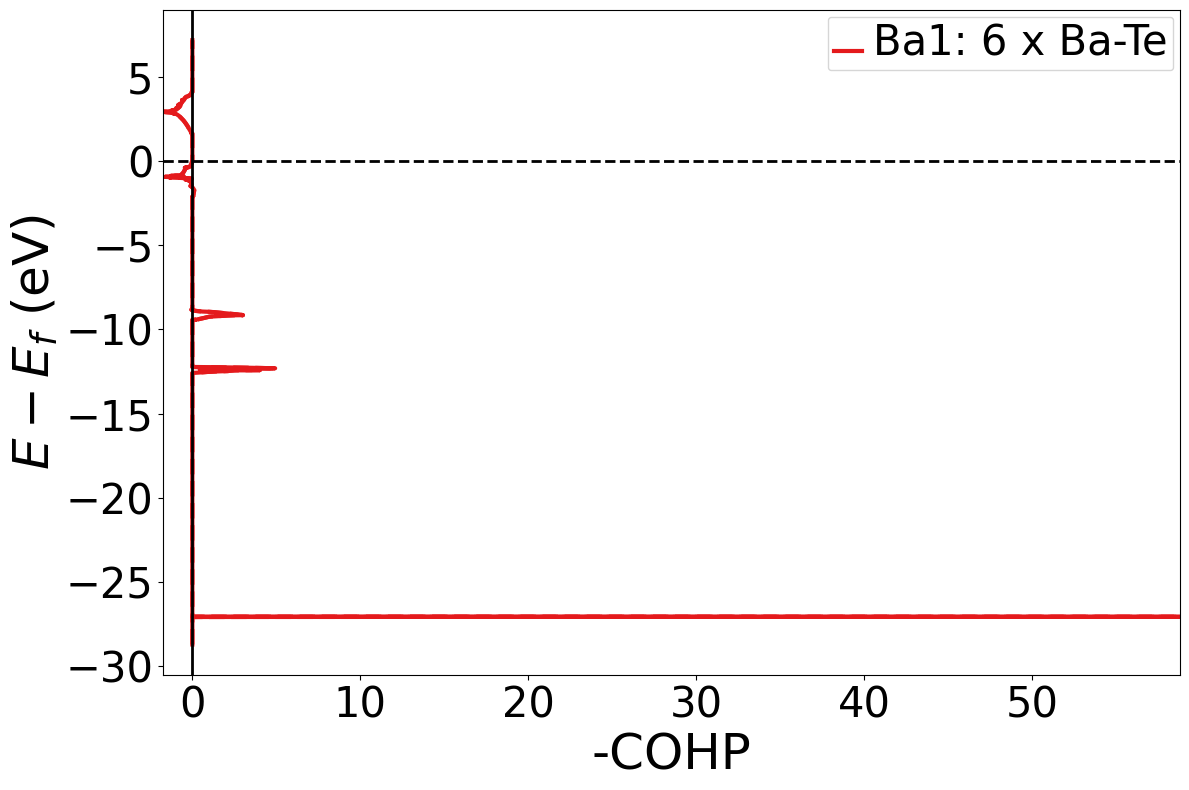

In [6]:
# Recreate automatic analysis plots (cation-anion mode)
for number, (key, cohp) in enumerate(lobster_summary['cation_anion_bonds']["lobsterpy_data"]["cohp_plot_data"].items()):
    plotter = CohpPlotter()
    cohp = Cohp.from_dict(cohp)
    plotter.add_cohp(key, cohp)
    plotter.show()

#### All bonds mode

In [7]:
# Summarized bonding dictionary for all bonds 
lobster_summary['all_bonds']

{'lobsterpy_data': {'formula': 'BaTe',
  'max_considered_bond_length': 5.01322,
  'limit_icohp': [-inf, -0.1],
  'number_of_considered_ions': 2,
  'sites': {'0': {'env': '18',
    'bonds': {'Ba': {'ICOHP_mean': '-0.12',
      'ICOHP_sum': '-1.42',
      'has_antibdg_states_below_Efermi': True,
      'number_of_bonds': 12,
      'bonding': {'integral': 2.05, 'perc': 0.76493},
      'antibonding': {'integral': 0.63, 'perc': 0.23507}},
     'Te': {'ICOHP_mean': '-0.45',
      'ICOHP_sum': '-2.7',
      'has_antibdg_states_below_Efermi': True,
      'number_of_bonds': 6,
      'bonding': {'integral': 3.68, 'perc': 0.78801},
      'antibonding': {'integral': 0.99, 'perc': 0.21199}}},
    'ion': 'Ba',
    'charge': 1.58,
    'relevant_bonds': ['1',
     '2',
     '3',
     '4',
     '5',
     '6',
     '7',
     '8',
     '9',
     '10',
     '11',
     '12',
     '13',
     '14',
     '15',
     '16',
     '17',
     '18']},
   '1': {'env': '6',
    'bonds': {'Ba': {'ICOHP_mean': '-0.45',
 

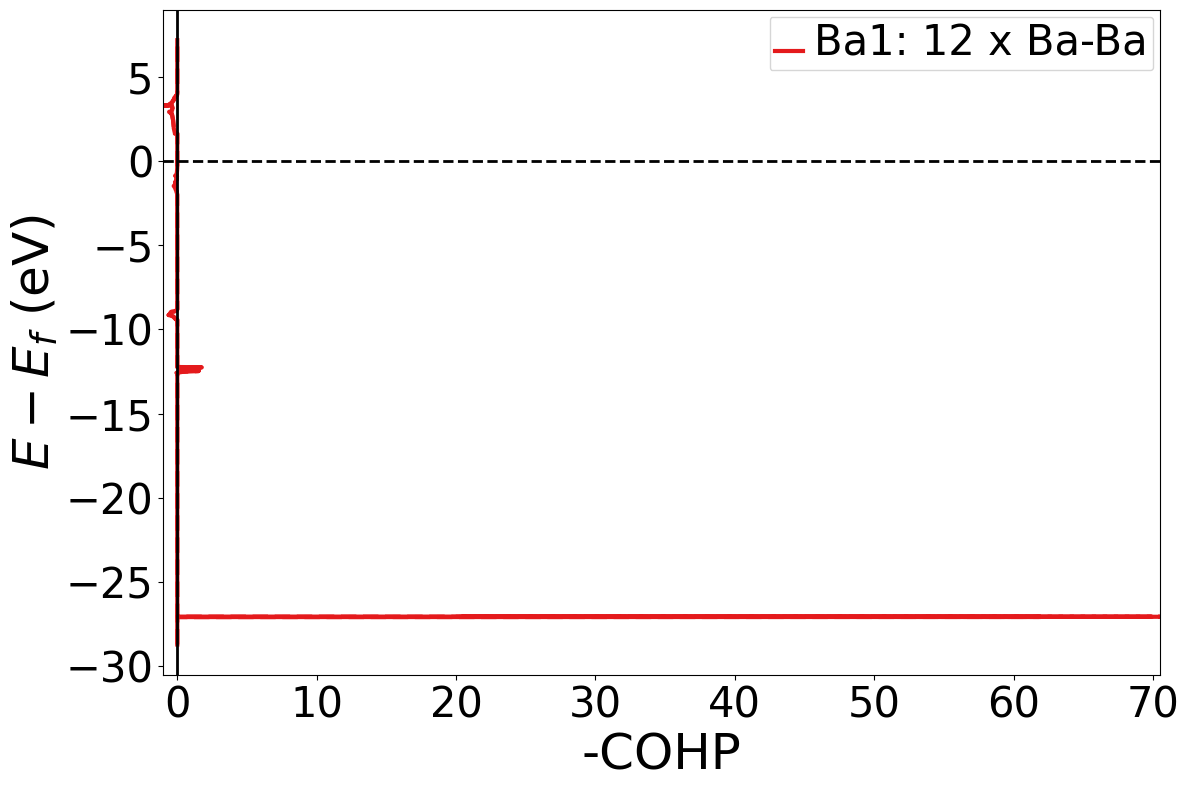

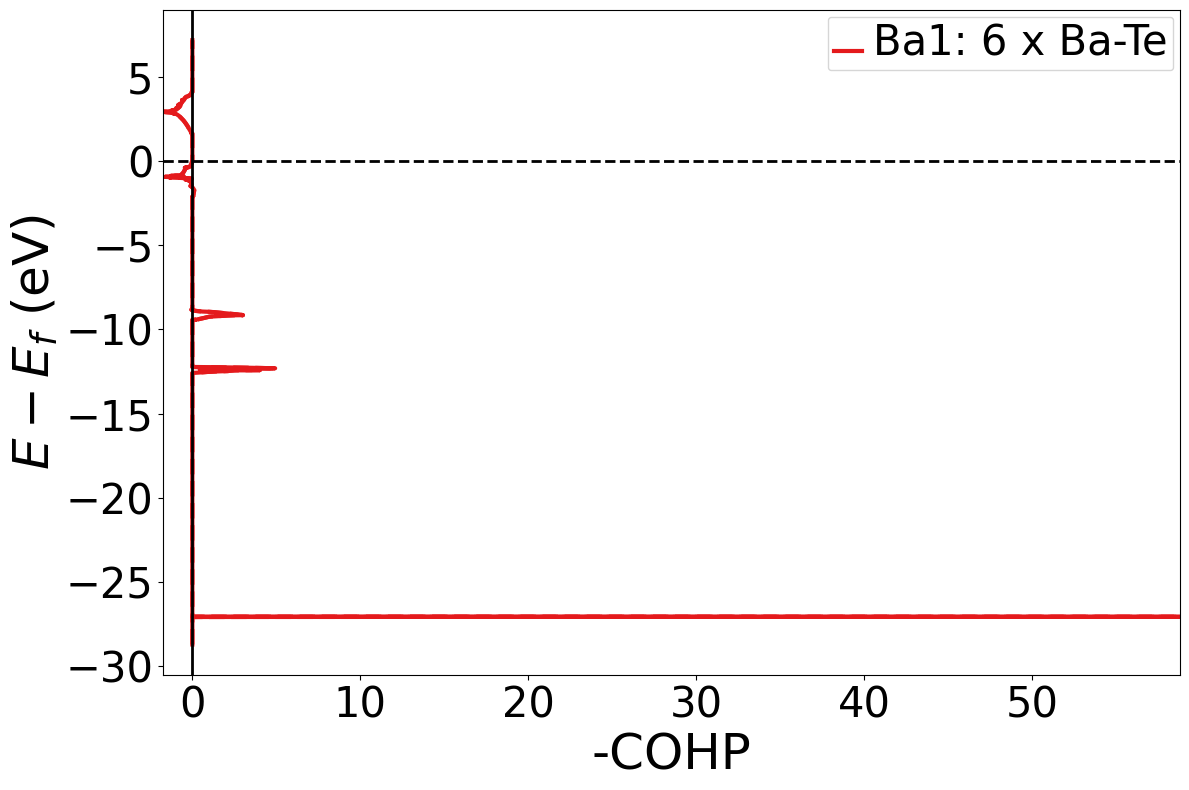

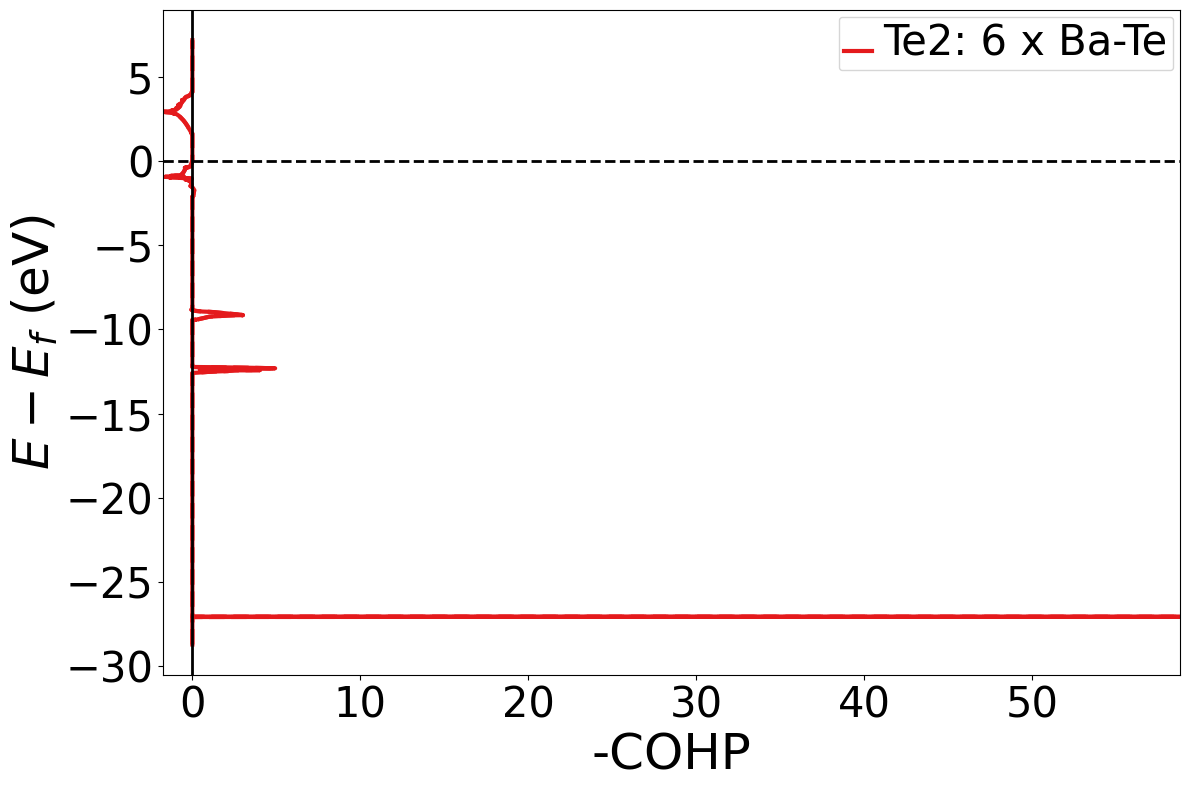

In [8]:
# Recreate automatic analysis plots (all bonds)
for number, (key, cohp) in enumerate(lobster_summary['all_bonds']["lobsterpy_data"]["cohp_plot_data"].items()):
    plotter = CohpPlotter()
    cohp = Cohp.from_dict(cohp)
    plotter.add_cohp(key, cohp)
    plotter.show()

In [9]:
#Atomic charges for the sites in input crystal structure 
lobster_summary['charges']

{'Mulliken': [1.58, -1.58], 'Loewdin': [1.49, -1.49]}

In [10]:
# Madelung energy of the structure
lobster_summary['madelung_energies']

{'Mulliken': -17.68, 'Loewdin': -15.69, 'Ewald_splitting': 3.14}

In [11]:
# Summary of calculation quality from technical validation tests 
lobster_summary['calc_quality_summary']

{'minimal_basis': True,
 'charge_spilling': {'abs_charge_spilling': 2.26},
 'band_overlaps': {'file_exists': False,
  'limit_maxDeviation': None,
  'has_good_quality_maxDeviation': True,
  'max_deviation': None,
  'percent_kpoints_abv_limit': None},
 'charges': {'BVA_Mulliken_agree': True, 'BVA_Loewdin_agree': True},
 'dos_comparisons': {'tanimoto_orb_s': 0.9715,
  'tanimoto_orb_p': 0.888,
  'tanimoto_summed': 0.9039,
  'e_range': [-15, 0],
  'n_bins': 256}}